In [78]:
# Data Manipulation and Analysis
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Data Visualization
import matplotlib.pyplot as plt  # Static, animated, and interactive visualizations
import seaborn as sns  # High-level interface for drawing attractive statistical graphics

# Text Processing
import re  # For regular expressions
import string  # String constants and functions
import nltk  # Natural Language Toolkit for processing human language data
from nltk.stem import PorterStemmer, WordNetLemmatizer  # For stemming and lemmatization
from nltk.tokenize import word_tokenize  # For tokenizing text into words
from nltk.corpus import stopwords  # Common stopwords in text

# Text Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # Text feature extraction methods

# Machine Learning Models
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.naive_bayes import BernoulliNB  # Naive Bayes classifier for binary features
from sklearn import svm  # Support Vector Machines
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from xgboost import XGBClassifier  # XGBoost classifier for gradient boosting

# Model Evaluation and Selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold  # Data splitting and cross-validation
from sklearn.metrics import (  # Metrics for evaluating models
    mean_squared_error, mean_absolute_error,
    make_scorer, classification_report,
    confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve, f1_score
)

# Statistical Functions
from scipy import stats  # Statistical functions

# Progress Monitoring
from tqdm import tqdm  # Progress bar for loops

# Word Embeddings and Topic Modeling
import gensim  # Topic modeling and document similarity analysis

# Natural Language Processing with Transformers
from transformers import pipeline  # For NLP models and pipelines

# Visualization for Geographic Data
import geopandas as gpd  # For spatial data manipulation
import folium  # For interactive maps
from geopy.geocoders import Nominatim  # Geocoding addresses to coordinates
from geopy.exc import GeocoderTimedOut  # Exception for geocoding timeouts

# Color Mapping and Date Manipulation
import branca.colormap as cm  # Color mapping for visualizations
from datetime import datetime  # Date and time manipulation

# Deep Learning with TensorFlow
import tensorflow as tf  # Deep learning framework
from tensorflow.keras.preprocessing.text import Tokenizer  # Text to sequence conversion
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Padding sequences for uniform length
from tensorflow.keras.models import Sequential  # Sequential model building
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout  # Layers for neural networks
from tensorflow.keras.callbacks import EarlyStopping  # Callback for early stopping
from tensorflow.keras.optimizers import Adam  # Optimization algorithm
from tensorflow.keras.regularizers import l2  # Regularization methods

# Collections
from collections import Counter  # For counting hashable objects

# NLTK Downloads
nltk.download('punkt', quiet=True)  # Download tokenizer
nltk.download('stopwords', quiet=True)  # Download stopwords
nltk.download('wordnet', quiet=True)  # Download WordNet for lemmatization

# Set display options for pandas
pd.set_option("display.max_colwidth", 200)  # Customize DataFrame display options

In [34]:
warnings.filterwarnings("ignore")

## Loading and merging three CSV datasets

In [35]:
file1 = 'Covid-19 Twitter Dataset (Apr-Jun 2020).csv'
file2 = 'Covid-19 Twitter Dataset (Aug-Sep 2020).csv'
file3 = 'Covid-19 Twitter Dataset (Apr-Jun 2021).csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

count1 = df1.shape[0]
count2 = df2.shape[0]
count3 = df3.shape[0]

merged_df = pd.concat([df1, df2, df3], ignore_index=True)

merged_count = merged_df.shape[0]

print(f"Counts in original datasets:")
print(f"Dataset 1 (Apr-Jun 2020): {count1}")
print(f"Dataset 2 (Aug-Sep 2020): {count2}")
print(f"Dataset 3 (Apr-Jun 2021): {count3}")
print(f"\nTotal count in the merged dataset: {merged_count}")

Counts in original datasets:
Dataset 1 (Apr-Jun 2020): 143903
Dataset 2 (Aug-Sep 2020): 120509
Dataset 3 (Apr-Jun 2021): 147475

Total count in the merged dataset: 411887


## Exploratory Data Analysis

In [36]:
merged_df.dtypes

id                 float64
created_at          object
source              object
original_text       object
lang                object
favorite_count     float64
retweet_count      float64
original_author     object
hashtags            object
user_mentions       object
place               object
clean_tweet         object
compound           float64
neg                float64
neu                float64
pos                float64
sentiment           object
dtype: object

In [37]:
null_values = merged_df.isnull().sum()
null_values

id                      4
created_at              2
source                300
original_text           2
lang                    3
favorite_count          3
retweet_count           3
original_author         3
hashtags           314112
user_mentions      116680
place              118112
clean_tweet          1972
compound                0
neg                     0
neu                     0
pos                     0
sentiment               0
dtype: int64

In [38]:
df1.columns

Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment'],
      dtype='object')

In [39]:
df2.columns

Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment'],
      dtype='object')

In [40]:
df3.columns

Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment'],
      dtype='object')

In [41]:
merged_df.columns

Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment'],
      dtype='object')

In [42]:
merged_df.head()

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
0,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @GlblCtzn: .@priyankachopra is calling on leaders to help protect refugees from COVID-19 by providing them with quality health care and…,en,0.0,31.0,RJIshak,NaN,"GlblCtzn, priyankachopra",Jakarta Capital Region,call leader help protect refuge covid19 provid qualiti health care,0.8176,0.0,0.452,0.548,pos
1,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-NIRSAL COVID-19 TARGETED CREDIT FACILITY - TCF https://t.co/koWBQECoQq,en,0.0,61.0,makinwaoluwole,NaN,OGSG_Official,Nigeria,ogun state support cbn nirsal covid19 target credit facil tcf,0.6486,0.0,0.602,0.398,pos
2,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @AdvoBarryRoux: These 5 police officials based at Namahadi police station were busy drinking liquor at a certain tavern whilst on duty,…",en,0.0,1.0,TembeAmu,NaN,AdvoBarryRoux,NaN,polic offici base namahadi polic station busi drink liquor certain tavern whilst duti,0.2732,0.0,0.851,0.149,pos
3,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @MobilePunch: COVID-19: Oyo discharges two patients\nhttps://t.co/eQRE00ZiJo,en,0.0,0.0,ilyasrabiu,NaN,MobilePunch,"Lagos, Nigeria",covid19 oyo discharg two patient,0.0000,0.0,1.000,0.000,neu
4,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",My Condolences to the Family of those who did not survive #Covid_19!,en,0.0,13869.0,bucketeconomist,Covid_19,NaN,NaN,condol famili surviv,0.0000,0.0,1.000,0.000,neu


In [43]:
merged_df.created_at.value_counts()

created_at
2021-06-03    7229
2020-05-04    7165
2021-05-25    7114
2020-09-27    7040
2020-09-30    7028
              ... 
2021-05-20     352
2020-04-19     339
2021-04-27     220
2020-06-08     209
2020-04-23     163
Name: count, Length: 154, dtype: int64

In [44]:
merged_df['sentiment'].value_counts()

sentiment
neu    174898
pos    127360
neg    109629
Name: count, dtype: int64

In [45]:
merged_df.dtypes

id                 float64
created_at          object
source              object
original_text       object
lang                object
favorite_count     float64
retweet_count      float64
original_author     object
hashtags            object
user_mentions       object
place               object
clean_tweet         object
compound           float64
neg                float64
neu                float64
pos                float64
sentiment           object
dtype: object

In [46]:
merged_df[merged_df['sentiment']=='pos']

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
0,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @GlblCtzn: .@priyankachopra is calling on leaders to help protect refugees from COVID-19 by providing them with quality health care and…,en,0.0,31.0,RJIshak,NaN,"GlblCtzn, priyankachopra",Jakarta Capital Region,call leader help protect refuge covid19 provid qualiti health care,0.8176,0.0,0.452,0.548,pos
1,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-NIRSAL COVID-19 TARGETED CREDIT FACILITY - TCF https://t.co/koWBQECoQq,en,0.0,61.0,makinwaoluwole,NaN,OGSG_Official,Nigeria,ogun state support cbn nirsal covid19 target credit facil tcf,0.6486,0.0,0.602,0.398,pos
2,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @AdvoBarryRoux: These 5 police officials based at Namahadi police station were busy drinking liquor at a certain tavern whilst on duty,…",en,0.0,1.0,TembeAmu,NaN,AdvoBarryRoux,NaN,polic offici base namahadi polic station busi drink liquor certain tavern whilst duti,0.2732,0.0,0.851,0.149,pos
11,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @BuckSexton: Doctor friend who is delivering babies during this crisis told me very interesting data from 2 large nyc area hospitals:\n\nT…,en,0.0,19.0,winniekiiza1,NaN,BuckSexton,"Kampala, Uganda",doctor friend deliv babi crisi told interest data larg nyc area hospit,0.7351,0.0,0.617,0.383,pos
13,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @ClevelandClinic: Prevention is key. Know the simple steps you can take today to protect yourself from #COVID19 https://t.co/BKDX2NsMX2…,en,0.0,0.0,IDevilNeck,COVID19,ClevelandClinic,North Coast,prevent key know simpl step take today protect,0.4019,0.0,0.619,0.381,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411876,1.409140e+18,2021-06-27,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",Robin Swann hails 2 million vaccination milestone as Northern Ireland records another 261 Covid-19 cases… https://t.co/PApiOmdb6d,en,0.0,17.0,BelTel,NaN,NaN,"Belfast, Northern Ireland",robin swann hail million vaccin mileston northern ireland record anoth covid19 case,0.0772,0.0,0.894,0.106,pos
411877,1.409140e+18,2021-06-27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",.@ResidentFOX thank you for not giving us a COVID-19 season.,en,0.0,5.0,xovaughn,NaN,ResidentFOX,"Duval, FL",thank give covid19 season,0.3612,0.0,0.545,0.455,pos
411881,1.409140e+18,2021-06-27,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",@sinonome_umi Now you can relax from the COVID-19 virus 🙂😊😭 https://t.co/nCMtdrH0pl,en,0.0,326.0,Angelo32492514,NaN,sinonome_umi,NaN,relax covid19 viru,0.4404,0.0,0.408,0.592,pos
411884,1.409130e+18,2021-06-27,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",Goal is reached: 40 per cent of Chinese get Covid-19 jab before end of June https://t.co/ssYlXXNsZJ via @scmpnews,en,0.0,0.0,DavidGr07837209,NaN,SCMPNews,"Melbourne, Victoria, Australia",goal reach per cent chines get covid19 jab end june via,0.0258,0.0,0.901,0.099,pos


In [47]:
filtered_df = merged_df[merged_df['sentiment']=='pos'].reset_index(drop=True)
print(filtered_df.loc[20, 'clean_tweet'])

need find person surviv corona viru fulli recov donat save uncl life pleas pleas


In [48]:
merged_df[merged_df['sentiment']=='neu']

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
3,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @MobilePunch: COVID-19: Oyo discharges two patients\nhttps://t.co/eQRE00ZiJo,en,0.0,0.0,ilyasrabiu,NaN,MobilePunch,"Lagos, Nigeria",covid19 oyo discharg two patient,0.0,0.0,1.0,0.0,neu
4,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",My Condolences to the Family of those who did not survive #Covid_19!,en,0.0,13869.0,bucketeconomist,Covid_19,NaN,NaN,condol famili surviv,0.0,0.0,1.0,0.0,neu
5,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @DrJMZimmerman: I received this text from my 19 year old son who is working with COVID patients. To those who equate quarantine with com…,en,0.0,526.0,rohaniroop,NaN,DrJMZimmerman,"British Columbia, Canada",receiv text year old son work covid19 patient equat quarantin com,0.0,0.0,1.0,0.0,neu
8,1.250000e+18,2020-04-19,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",Horrible tragedy in Nova Scotia today. How will these families get closure during the pandemic? Will there be funer… https://t.co/okGy9PfPZB,en,0.0,23.0,MichelleCarbert,NaN,NaN,"Ottawa, Ontario",horribl tragedi nova scotia today famili get closur pandem funer,0.0,0.0,1.0,0.0,neu
9,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","@TahirsyeedK @sagarikaghose Covid-19 can be cured sooner or later,but who will cure the Ghose virus ?",en,0.0,6.0,Deshbha21624810,NaN,"TahirsyeedK, sagarikaghose",NaN,covid19 cure sooner later cure ghose viru,0.0,0.0,1.0,0.0,neu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411875,1.409140e+18,2021-06-27,"<a href=""https://app.socialpilot.co/"" rel=""nofollow"">SocialPilot.co</a>",Click the link to listen to Covid-20x20: Wave Four on your prefered music streaming platform!… https://t.co/DNDvFgFgWS,en,0.0,1450.0,redkattseven,NaN,NaN,"Cincinnati, Ohio, USA",click link listen covid19 wave four prefer music stream platform,0.0,0.0,1.0,0.0,neu
411879,1.409140e+18,2021-06-27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@GovRonDeSantis So in other words, businesses can create unsafe work environments for their employees &amp; customers w… https://t.co/FHlQsZs90p",en,0.0,0.0,growglobal1,NaN,GovRonDeSantis,"Tampa, FL",word busi creat unsaf work environ employe custom,0.0,0.0,1.0,0.0,neu
411880,1.409140e+18,2021-06-27,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @devisridhar: Countries across the world are all trying to head in the same direction: to make COVID manageable with vaccines. Other str…,en,0.0,94.0,mesodweezil,NaN,devisridhar,NaN,countri across world tri head direct make covid19 manag vaccin str,0.0,0.0,1.0,0.0,neu
411882,1.409140e+18,2021-06-27,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",Just as the northern hemisphere summer season kicks off and the European Union’s Covid-19 travel certificates becom… https://t.co/EupJQfEuFs,en,0.0,0.0,jmhamiltonblog,NaN,NaN,🇨🇦🇺🇸🏳️‍🌈,northern hemispher summer season kick european union covid19 travel certif becom,0.0,0.0,1.0,0.0,neu


In [49]:
filtered_df = merged_df[merged_df['sentiment']=='neu'].reset_index(drop=True)
print(filtered_df.loc[20, 'clean_tweet'])

covid19 edo impos curfew


In [50]:
merged_df[merged_df['sentiment']=='neg']

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
6,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Taiwan's Vice-President Chen Chien-jen on his country's fight with Covid-19 https://t.co/SmdtNFAFZf,en,0.0,119.0,agostinhozinga,NaN,NaN,"London, England",taiwan vice presid chen chien jen countri fight covid19,-0.3818,0.245,0.755,0.0,neg
7,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @morethanmySLE: BREAKING: A New York woman with #coronavirus symptoms died last week after being prescribed a drug cocktail with known c…,en,0.0,474.0,DrJeffreyPOlson,coronavirus,morethanmySLE,JPO Aesthetics,break new york woman symptom die last week prescrib drug cocktail known,-0.5994,0.262,0.738,0.0,neg
12,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @KatiePhang: “‘[COVID-19] can attack almost anything in the body with devastating consequences. Its ferocity is breathtaking and humbli…,en,0.0,20173.0,annmartincwc,NaN,KatiePhang,NaN,covid19 attack almost anyth bodi devast consequ feroc breathtak humbl,-0.4767,0.256,0.744,0.0,neg
15,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","RT @JoeConchaTV: Wallace to Pelosi on her also downplaying COVID-19: If the president underplayed the threat in the early days, Speaker Pel…",en,0.0,408.0,freegalt,NaN,JoeConchaTV,NaN,wallac pelosi also downplay covid19 presid underplay threat earli day speaker pel,-0.5267,0.236,0.764,0.0,neg
16,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @OIC_IPHRC: 1/2 #OIC-IPHRC condemns the unrelenting vicious #Islamophobic campaign in #India maligning Muslims for spread of #COVID-19…,en,0.0,227.0,kashif_afzalkpk,"OIC, Islamophobic, India, COVID",OIC_IPHRC,"Dubai, United Arab Emirates",iphrc condemn unrel viciou campaign malign muslim spread,-0.3818,0.271,0.729,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411871,1.409140e+18,2021-06-27,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","RT @barandbench: [COVID-19] ""How is board exam a threat but not IIT JEE or CLAT?"" Plea in Supreme Court challenges CBSE, ICSE decision to c…",en,0.0,717.0,Pratiko05964386,NaN,barandbench,NaN,covid19 board exam threat iit jee clat plea suprem court challeng cbse ics decis,-0.5267,0.207,0.793,0.0,neg
411872,1.409140e+18,2021-06-27,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","RT @IndigoFast: Australia in turmoil as multiple states grapple with outbreaks, lockdowns https://t.co/GAEmgCrVkM",en,0.0,6.0,TheAlexHughes,NaN,IndigoFast,Scotland,australia turmoil multipl state grappl outbreak lockdown,-0.3612,0.294,0.706,0.0,neg
411874,1.409140e+18,2021-06-27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @iran_policy: Iran: The Staggering Coronavirus Death Toll Exceeds 318,000\n#Iran #Coronavirus\nhttps://t.co/fsJwVN19cn",en,0.0,30.0,mehraz_rahimi,"Iran, Coronavirus",iran_policy,"Miami, FL",iran stagger coronaviru death toll exce,-0.5994,0.438,0.562,0.0,neg
411878,1.409140e+18,2021-06-27,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",RT @samacharnews_in: Delta Plus Has More Affinity for Lung Tissues in Comparison to Other Covid-19 Strains: NTAGI Chief https://t.co/Nmc5xj…,en,0.0,813.0,FGCTweets,NaN,samacharnews_in,New Delhi,delta plu affin lung tissu comparison covid19 strain ntagi chief,-0.0516,0.118,0.882,0.0,neg


In [51]:
filtered_df = merged_df[merged_df['sentiment']=='neg'].reset_index(drop=True)
print(filtered_df.loc[20, 'clean_tweet'])

bet one singl arrest thousand isra brave covid19 heath risk protest


In [52]:
pd.isnull(merged_df["sentiment"])

0         False
1         False
2         False
3         False
4         False
          ...  
411882    False
411883    False
411884    False
411885    False
411886    False
Name: sentiment, Length: 411887, dtype: bool

In [53]:
null_count = merged_df.isnull().sum()
print(null_count)

id                      4
created_at              2
source                300
original_text           2
lang                    3
favorite_count          3
retweet_count           3
original_author         3
hashtags           314112
user_mentions      116680
place              118112
clean_tweet          1972
compound                0
neg                     0
neu                     0
pos                     0
sentiment               0
dtype: int64


## Replacing and removing NULL values where appropriate

In [63]:
# This code snippet focuses on cleaning the merged COVID-19 Twitter dataset by addressing missing values in critical columns and filling them using appropriate strategies.
# The merged DataFrame is assigned to df for further processing.
# Rows with null values in 'id', 'created_at', 'original_text', or 'clean_tweet' are dropped since they are critical columns.
# Numerical columns are filled with the mean or median; 'favorite_count' is filled with its mean, and 'retweet_count' is filled with its median.
# Categorical columns are filled with the mode (most frequent value); 'source', 'lang', and 'original_author' are filled accordingly.
# For the 'hashtags', 'user_mentions', and 'place' columns, forward fill is used to propagate the last valid value forward for missing entries.
# Finally, the code prints the count of remaining null values in each column to verify if any null values remain.

df = merged_df  
df.dropna(subset=['id', 'created_at', 'original_text', 'clean_tweet'], inplace=True)  
df['favorite_count'].fillna(df['favorite_count'].mean(), inplace=True)  
df['retweet_count'].fillna(df['retweet_count'].median(), inplace=True)  
df['source'].fillna(df['source'].mode()[0], inplace=True)  
df['lang'].fillna(df['lang'].mode()[0], inplace=True)  
df['original_author'].fillna(df['original_author'].mode()[0], inplace=True)  
df['hashtags'].fillna(method='ffill', inplace=True)  
df['user_mentions'].fillna(method='ffill', inplace=True)  
df['place'].fillna(method='ffill', inplace=True)  

print(df.isnull().sum())  

id                 0
created_at         0
source             0
original_text      0
lang               0
favorite_count     0
retweet_count      0
original_author    0
hashtags           4
user_mentions      0
place              0
clean_tweet        0
compound           0
neg                0
neu                0
pos                0
sentiment          0
dtype: int64


## Bar plot for number of unique values in each column

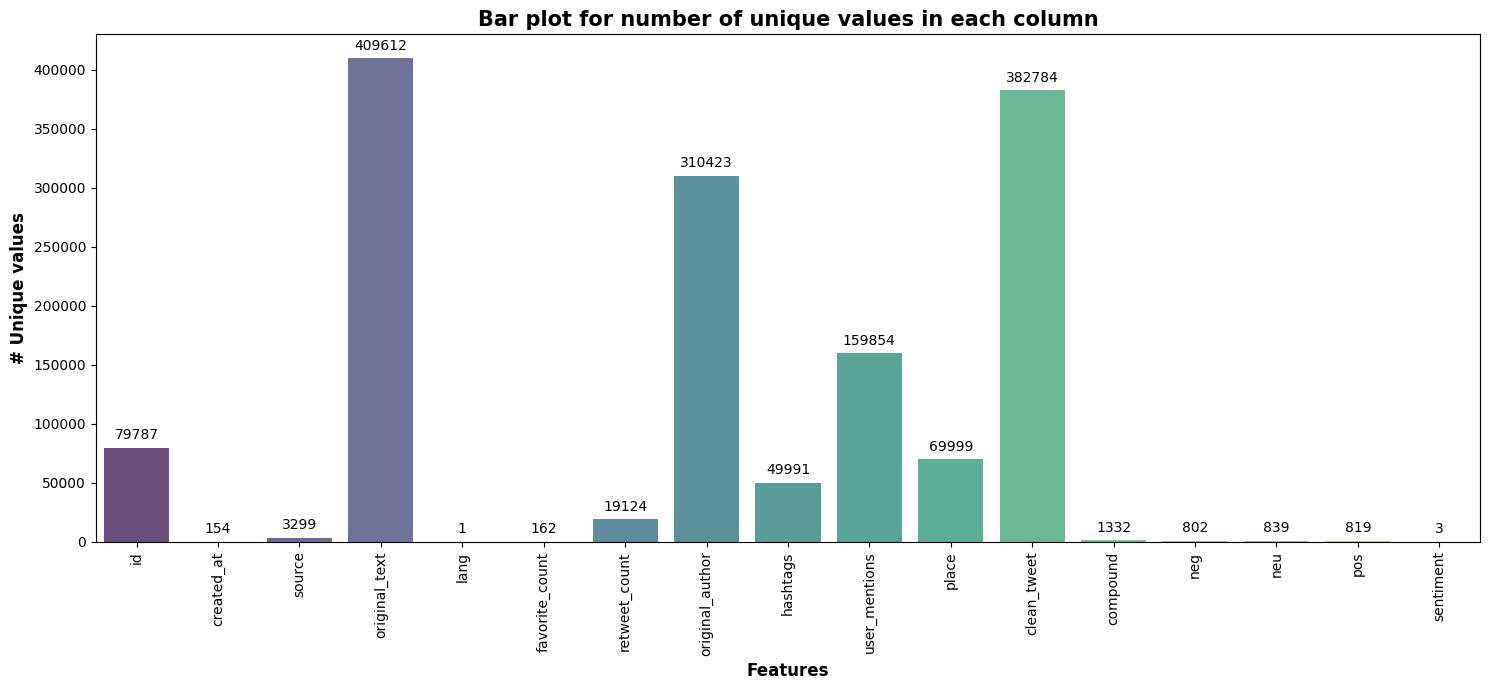

In [64]:
# This code creates a bar plot to visualize the number of unique values in each column of the merged DataFrame.
# A new DataFrame `unique_df` is created to store the features and their corresponding unique counts.

unique_df = pd.DataFrame()
unique_df['Features'] = merged_df.columns
unique_df['Uniques'] = [merged_df[col].nunique() for col in merged_df.columns]

plt.figure(figsize=(15, 7))
splot = sns.barplot(x='Features', y='Uniques', data=unique_df, palette='viridis', alpha=0.8)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), textcoords='offset points')

plt.title('Bar plot for number of unique values in each column', weight='bold', size=15)
plt.ylabel('# Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

## Location of Tweet

In [25]:
Top_Location_Of_tweet= merged_df['place'].value_counts().head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [26]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

,place,count
0,United States,6390
1,India,6069
2,London,3684
3,"London, England",3642
4,"Washington, DC",3245
5,Canada,3185
6,United Kingdom,3152
7,"New Delhi, India",2803
8,USA,2773
9,"New York, NY",2385


## Pie Chart Top Locations with Most Tweets

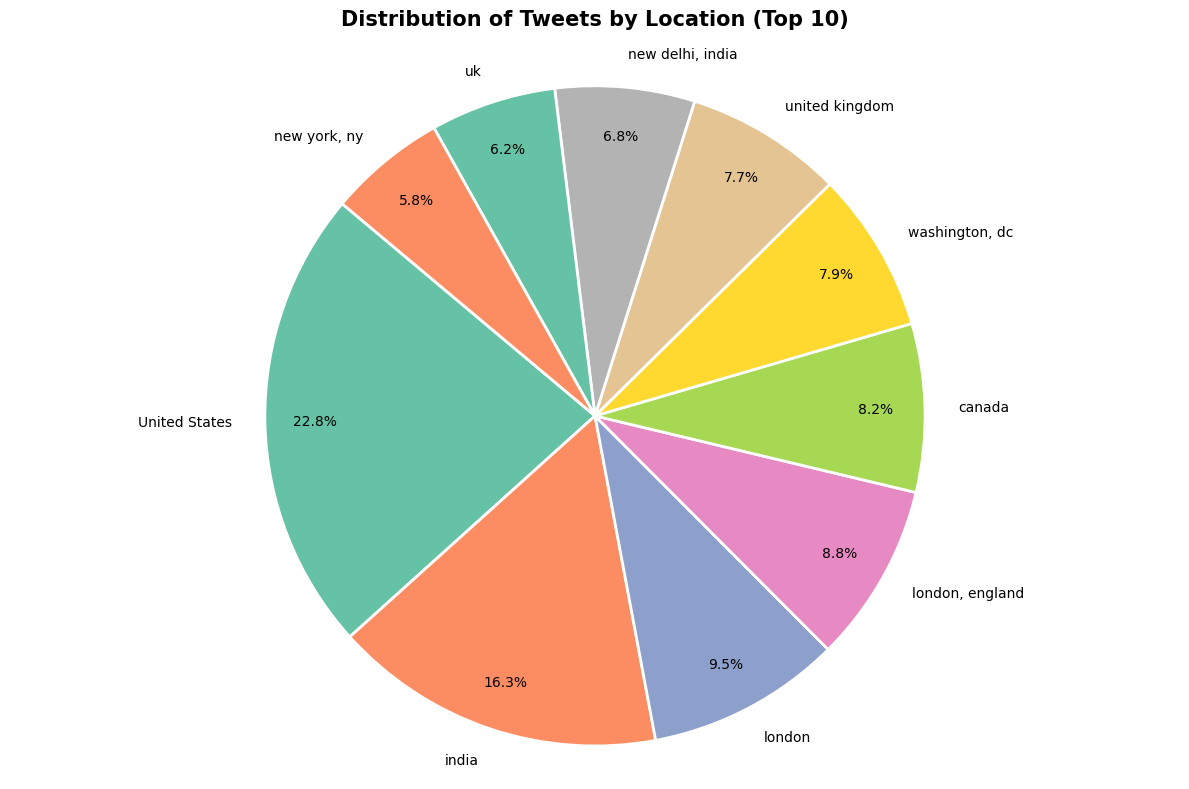


Number of tweets per location:
United States: 9,492 tweets (2.3%)
india: 6,778 tweets (1.7%)
london: 3,975 tweets (1.0%)
london, england: 3,660 tweets (0.9%)
canada: 3,436 tweets (0.8%)
washington, dc: 3,282 tweets (0.8%)
united kingdom: 3,216 tweets (0.8%)
new delhi, india: 2,848 tweets (0.7%)
uk: 2,568 tweets (0.6%)
new york, ny: 2,405 tweets (0.6%)


In [65]:
# This code standardizes the place names in the DataFrame by filling missing values with 'Unknown'
# and converting all names to lowercase and stripped of whitespace. 
# It then creates a mapping dictionary to consolidate different representations of the United States.
# After standardizing, it calculates the value counts for each location and selects the top N locations.
# A pie chart is created to visualize the distribution of tweets by location, and the actual counts are printed.

df['place'] = df['place'].fillna('Unknown')
df['place'] = df['place'].str.lower().str.strip()

place_mapping = {
    'usa': 'United States',
    'united states': 'United States',
    'u.s.': 'United States',
    'u.s.a': 'United States',
    'united states of america': 'United States'
}

df['place'] = df['place'].replace(place_mapping, regex=True)

Top_Location_Of_tweet = df['place'].value_counts()

N = 10
Top_Location_Of_tweet = Top_Location_Of_tweet.head(N)

plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set2', n_colors=len(Top_Location_Of_tweet))

plt.pie(
    Top_Location_Of_tweet.values,
    labels=Top_Location_Of_tweet.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

plt.title('Distribution of Tweets by Location (Top {})'.format(N), 
          weight='bold', 
          size=15, 
          pad=20)

plt.axis('equal')
plt.tight_layout()
plt.show()

print("\nNumber of tweets per location:")
for loc, count in Top_Location_Of_tweet.items():
    print(f"{loc}: {count:,} tweets ({count/len(df)*100:.1f}%)")


## Distribution of Sentiments in Tweets

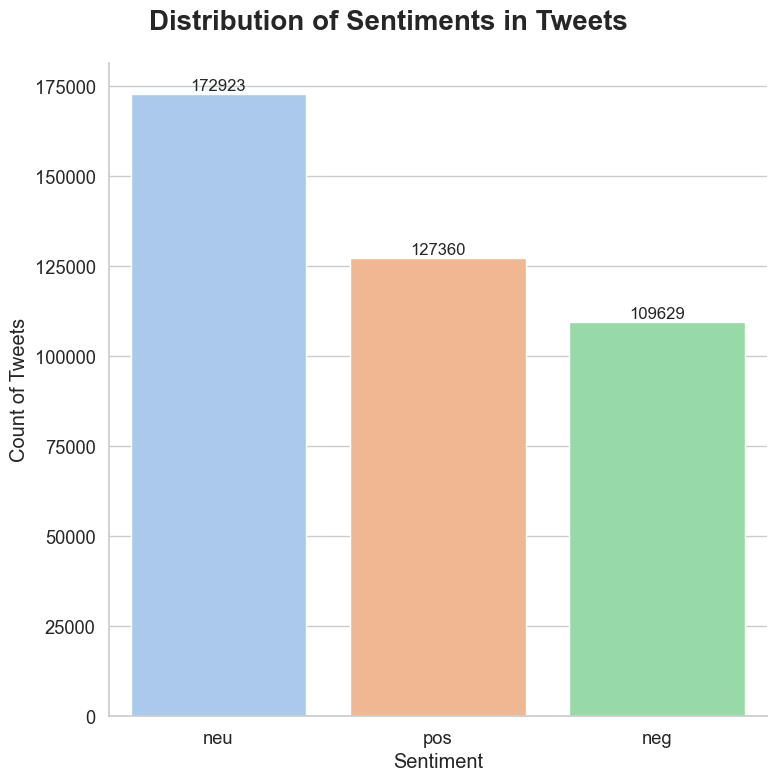

In [66]:
# This code sets up the Seaborn style and font size for improved readability, and then creates a count plot to visualize the distribution of sentiments in tweets.
# The count plot displays the number of tweets for each sentiment category using a pastel color palette. 
# The axes are labeled, and the title is customized for clarity. 
# Additionally, the counts are annotated on top of each bar for easy reference.

sns.set(style="whitegrid", font_scale=1.2)

g = sns.catplot(
    x="sentiment",
    data=merged_df,
    kind="count",
    height=8,
    palette="pastel",
    order=merged_df['sentiment'].value_counts().index
)

g.set_axis_labels("Sentiment", "Count of Tweets")
g.fig.suptitle("Distribution of Sentiments in Tweets", fontsize=20, weight='bold')
g.set_xticklabels(rotation=0)

for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=12
        )

plt.tight_layout()
plt.show()

## KDE Plot of Tweet Length by Sentiment

Unique Sentiments: ['pos' 'neu' 'neg']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


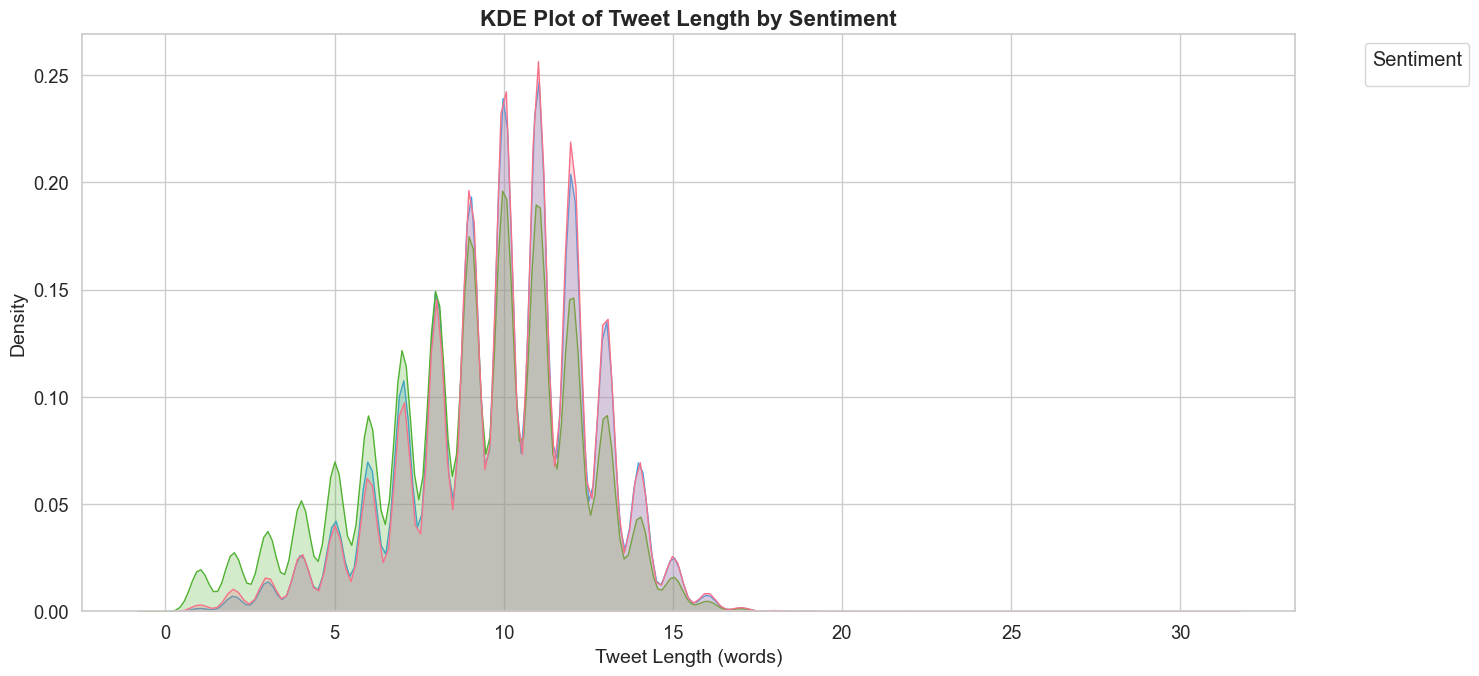

In [68]:
# This code processes a DataFrame containing tweets and their sentiments.
# It calculates the length of each tweet, drops any rows with missing values,
# and then creates a kernel density estimate (KDE) plot to visualize the distribution
# of tweet lengths for each sentiment category.

PROCESSED = 'clean_tweet'  
TARGET = 'sentiment'  

filtered_df = merged_df.dropna(subset=[PROCESSED, TARGET])

tweets_len = pd.DataFrame(
    {
        'Tweet Length (word)': [len(text.split()) for text in filtered_df[PROCESSED]],
        'Sentiment': filtered_df[TARGET].astype(str)  
    }
)

print("Unique Sentiments:", tweets_len['Sentiment'].unique())

distinct_palette = sns.color_palette("husl", len(tweets_len['Sentiment'].unique()))

plt.figure(figsize=(15, 7))
sns.kdeplot(data=tweets_len, x='Tweet Length (word)', hue='Sentiment', fill=True, palette=distinct_palette, common_norm=False)

plt.title('KDE Plot of Tweet Length by Sentiment', fontsize=16, weight='bold')
plt.xlabel('Tweet Length (words)', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.grid(True)

plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

plt.tight_layout() 
plt.show()


## Word Cloud of Common Words in Tweets

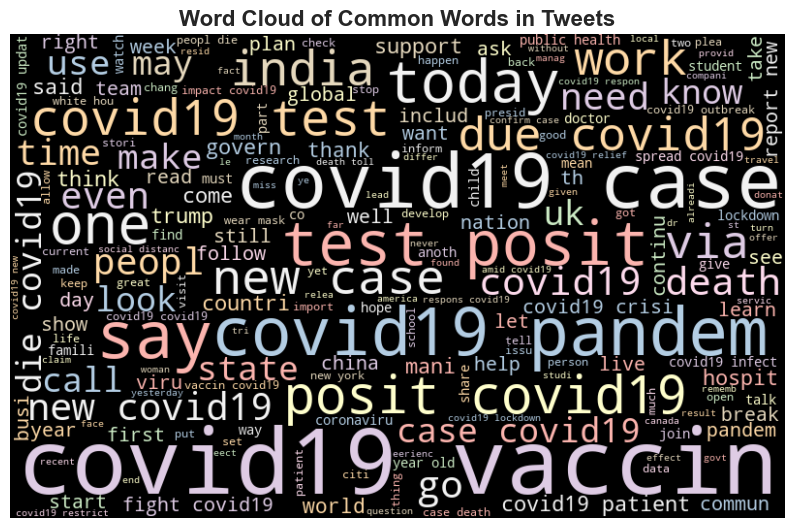

In [69]:
# This code generates a word cloud from the 'clean_tweet' column of the merged_df DataFrame.
# It concatenates all non-null tweets into a single string, then uses the WordCloud library to create a visual representation of common words.
# The resulting word cloud is displayed using Matplotlib with a pastel color palette.
# Create text from all tweets
# Remove NaN values from the list comprehension
all_words = ' '.join([str(text) for text in merged_df['clean_tweet'] if pd.notnull(text)])

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width=800,
    height=500,
    random_state=21,
    max_font_size=110,
    colormap='Pastel1' 
).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud of Common Words in Tweets", fontsize=16, weight='bold') 
plt.show()


## Word Cloud Sentiment Explorer

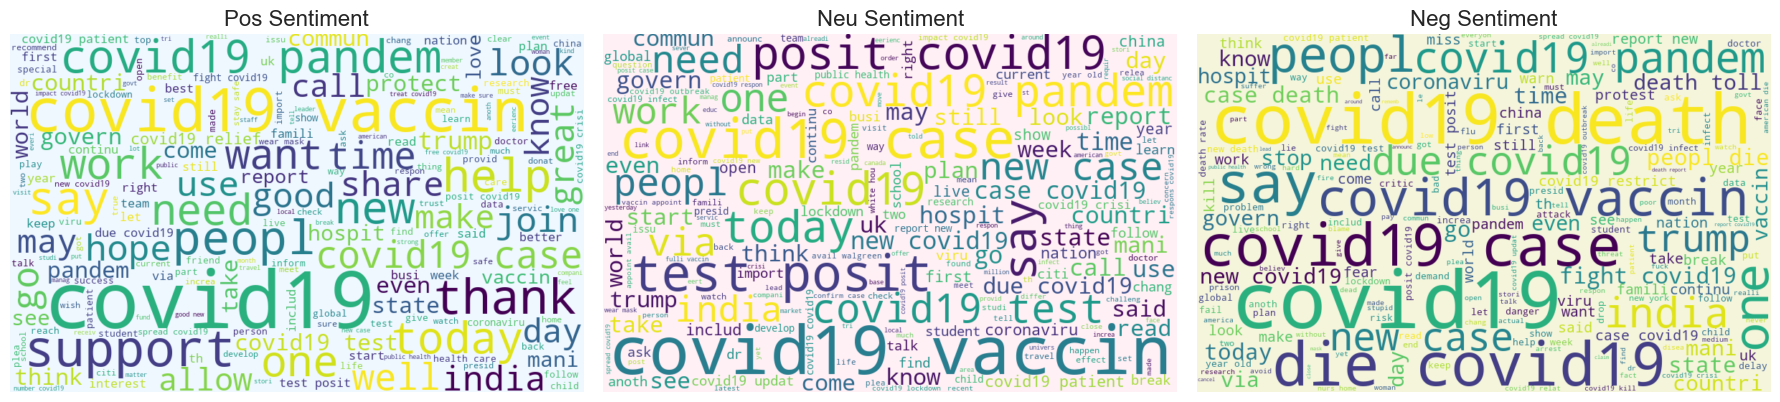

In [71]:
# This code generates word clouds for different sentiment categories found in the 'sentiment' column of the merged_df DataFrame.
# It visualizes the most common words associated with each sentiment by creating a separate word cloud for each.
# The word clouds are displayed side by side with different background colors for better differentiation.

sns.set(font_scale=1.1)

sentiments = merged_df['sentiment'].unique()

background_colors = ['#f0f8ff', '#fff0f5', '#f5f5dc']

plt.figure(figsize=(18, 6))

for i, (sentiment, bg_color) in enumerate(zip(sentiments, background_colors), 1):
    sentiment_words = ' '.join([str(text) for text in merged_df[merged_df['sentiment'] == sentiment]['clean_tweet'].dropna()])
    
    wordcloud = WordCloud(width=800, height=500, background_color=bg_color, random_state=21, max_font_size=110).generate(sentiment_words)
    
    plt.subplot(1, 3, i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f'{sentiment.capitalize()} Sentiment', fontsize=16)
    plt.axis('off')

plt.tight_layout()
plt.show()


## TOP 20 WORDS PER EACH SENTIMENT CLASSIFICATION

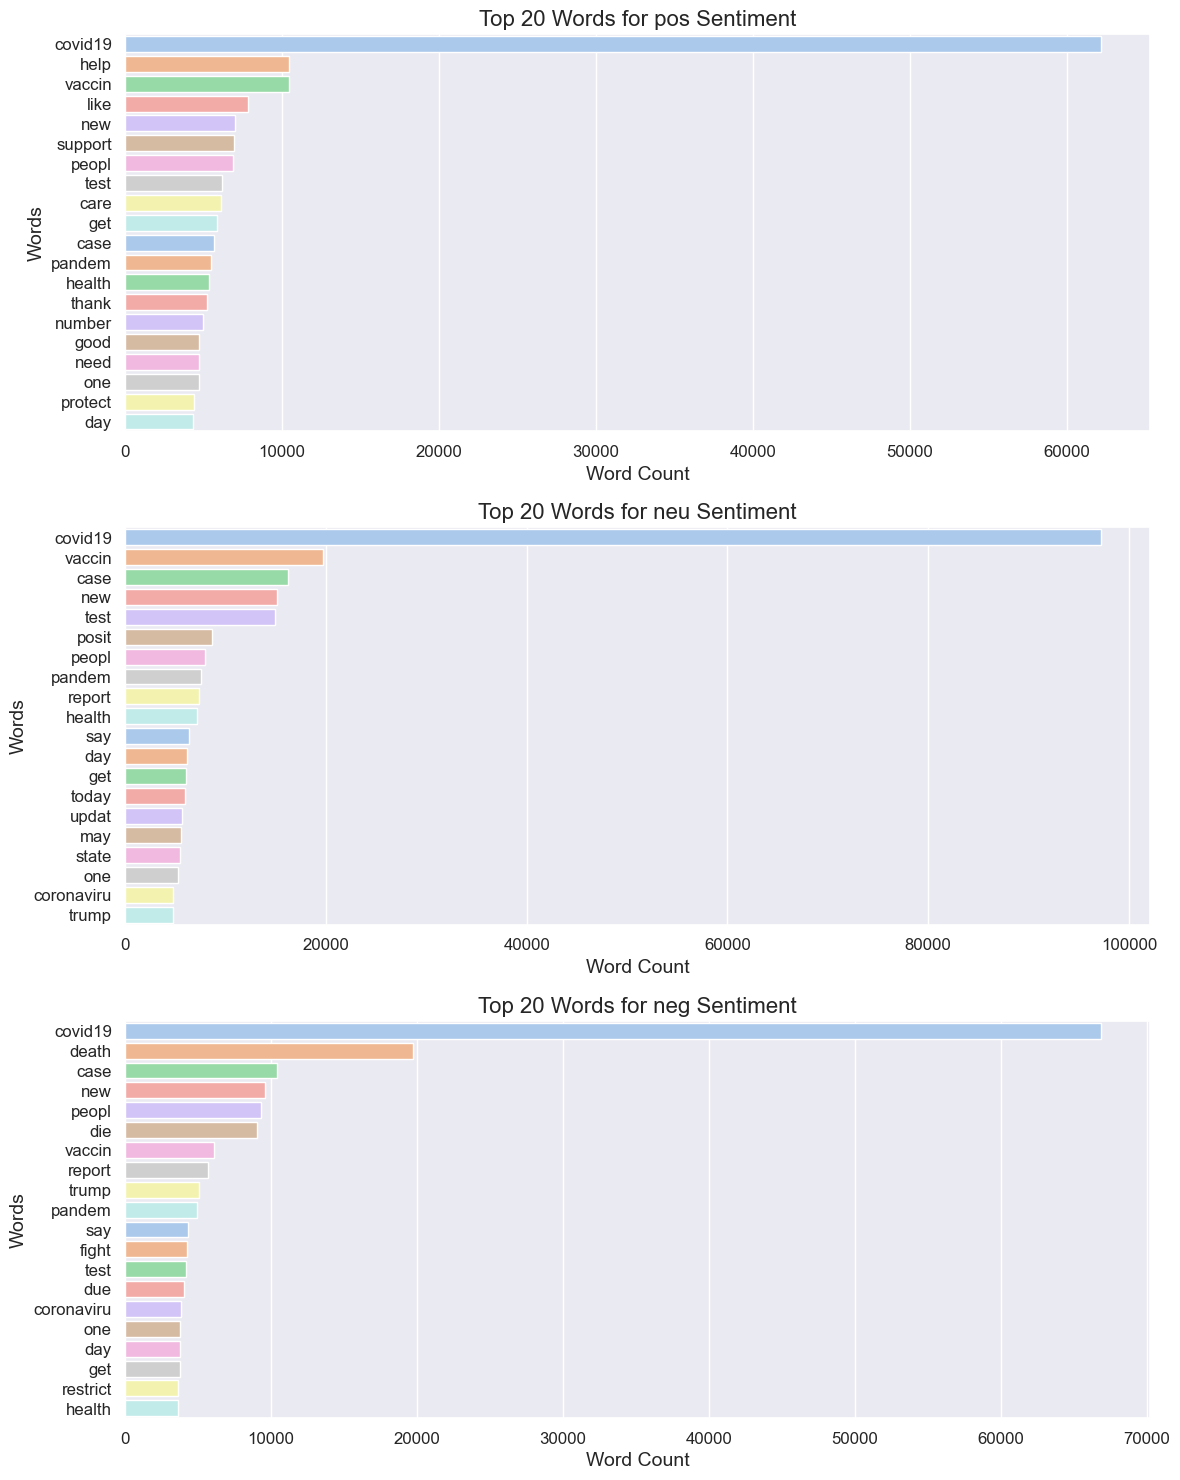

In [76]:
# This script analyzes the word frequency in a DataFrame of tweets categorized by sentiment.
# It assumes the DataFrame named merged_df contains columns 'clean_tweet' for the tweet text 
# and 'sentiment' for the associated sentiment labels.
# The code drops NaN values, counts word occurrences for each sentiment, and visualizes 
# the top 20 words per sentiment category using bar plots.

filtered_df = merged_df.dropna(subset=['clean_tweet', 'sentiment'])

word_counts = {}

for sentiment in filtered_df['sentiment'].unique():
    words = ' '.join(filtered_df[filtered_df['sentiment'] == sentiment]['clean_tweet'])
    word_counts[sentiment] = Counter(words.split())

fig, axes = plt.subplots(len(word_counts), 1, figsize=(12, 5 * len(word_counts)))

for axis, (target, words) in zip(axes.flatten(), word_counts.items()):
    bar_info = pd.Series(words).nlargest(20)
    sns.barplot(x=bar_info.values, y=bar_info.index, ax=axis, palette='pastel')
    axis.set_title(f'Top 20 Words for {target} Sentiment', fontsize=16)
    axis.set_xlabel('Word Count', fontsize=14)
    axis.set_ylabel('Words', fontsize=14)

plt.tight_layout()
plt.show()


In [30]:
df.columns

Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment'],
      dtype='object')

## GeoTweetVisualizer

In [77]:
# This code standardizes location names from a dataset of tweets, geocodes these locations to obtain latitude and longitude,
# and visualizes the top tweet locations on a map using Folium. It includes features like a legend, circle markers based on tweet counts,
# and displays count and location labels for clarity.

merged_df['place'] = merged_df['place'].fillna('Unknown')
merged_df['place'] = merged_df['place'].str.lower().str.strip()

place_mapping = {
    'usa': 'United States',
    'united states': 'United States',
    'u.s.': 'United States',
    'u.s.a': 'United States',
    'united states of america': 'United States'
}

merged_df['place'] = merged_df['place'].replace(place_mapping, regex=True)

def geocode_with_retry(location, geolocator, max_retries=3):
    for i in range(max_retries):
        try:
            if i > 0:
                time.sleep(1)
            return geolocator.geocode(location)
        except (GeocoderTimedOut, TimeoutError):
            if i == max_retries - 1:
                print(f"Failed to geocode {location}")
                return None
            continue

Top_Location_Of_tweet = merged_df['place'].value_counts().head(10)
Top_Location_Of_tweet_df = pd.DataFrame({
    'Location': Top_Location_Of_tweet.index, 
    'Location_Count': Top_Location_Of_tweet.values
})

geolocator = Nominatim(user_agent="geo_locator", timeout=10)

coordinates = []
for loc in Top_Location_Of_tweet_df['Location']:
    coord = geocode_with_retry(loc, geolocator)
    coordinates.append(coord)
    time.sleep(1)

Top_Location_Of_tweet_df['Coordinates'] = coordinates
Top_Location_Of_tweet_df.dropna(subset=['Coordinates'], inplace=True)
Top_Location_Of_tweet_df['Latitude'] = Top_Location_Of_tweet_df['Coordinates'].apply(lambda x: x.latitude)
Top_Location_Of_tweet_df['Longitude'] = Top_Location_Of_tweet_df['Coordinates'].apply(lambda x: x.longitude)

max_count = Top_Location_Of_tweet_df['Location_Count'].max()
Top_Location_Of_tweet_df['relative_size'] = Top_Location_Of_tweet_df['Location_Count'] / max_count

unique_colors = ['#FF4B4B', '#4169E1', '#32CD32', '#9370DB', '#FFA500', 
                 '#8B0000', '#FF6B6B', '#F5F5DC', '#00008B', '#006400']
Top_Location_Of_tweet_df['Color'] = [unique_colors[i % len(unique_colors)] 
                                       for i in range(len(Top_Location_Of_tweet_df))]

center_lat = Top_Location_Of_tweet_df['Latitude'].mean()
center_lon = Top_Location_Of_tweet_df['Longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=3)

legend_html = '''
    <div style="
        position: fixed;
        bottom: 50px;
        right: 50px;
        width: 200px;
        height: auto;
        background-color: white;
        border-radius: 5px;
        box-shadow: 0 0 15px rgba(0,0,0,0.2);
        padding: 10px;
        font-size: 12px;
        z-index: 1000;
    ">
        <div style="font-size: 14px;
                    font-weight: bold;
                    margin-bottom: 10px;
                    text-align: center;
                    border-bottom: 1px solid #ccc;
                    padding-bottom: 5px;">
            Tweet Locations
        </div>
'''

sorted_locations = Top_Location_Of_tweet_df.sort_values('Location_Count', ascending=False)
for idx, row in sorted_locations.iterrows():
    legend_html += f'''
        <div style="
            margin-bottom: 5px;
            display: flex;
            align-items: center;
            justify-content: space-between;
        ">
            <span style="
                display: inline-block;
                margin-right: 10px;
                width: 10px;
                height: 10px;
                border-radius: 50%;
                background-color: {row['Color']};
            "></span>
            <span style="flex-grow: 1; margin-left: 5px;">{row['Location']}</span>
            <span style="font-weight: bold;">{row['Location_Count']}</span>
        </div>
    '''

legend_html += '</div>'

m.get_root().html.add_child(folium.Element(legend_html))

Top_Location_Of_tweet_df = Top_Location_Of_tweet_df.sort_values('Location_Count', ascending=True)

for idx, row in Top_Location_Of_tweet_df.iterrows():
    circle_radius = min(20 * row['relative_size'], 25)
    
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=circle_radius,
        color=row['Color'],
        fill=True,
        fill_color=row['Color'],
        fill_opacity=0.7,
        popup=f"{row['Location']}: {row['Location_Count']} tweets",
        tooltip=f"{row['Location']}: {row['Location_Count']} tweets"
    ).add_to(m)
    
    folium.map.Marker(
        [row['Latitude'] + 0.2, row['Longitude']],
        icon=folium.DivIcon(
            icon_size=(60,20),
            icon_anchor=(30,0),
            html=f'''
                <div style="
                    font-size: 14px;
                    font-weight: bold;
                    background-color: white;
                    border: 2px solid {row['Color']};
                    border-radius: 4px;
                    padding: 0px 4px;
                    text-align: center;
                    box-shadow: 0 0 3px rgba(0,0,0,0.2);
                    width: fit-content;
                    margin: 0 auto;
                ">
                    {row['Location_Count']}
                </div>
            '''
        )
    ).add_to(m)
    
    folium.map.Marker(
        [row['Latitude'] - 0.2, row['Longitude']],
        icon=folium.DivIcon(
            icon_size=(100,20),
            icon_anchor=(50,0),
            html=f'''
                <div style="
                    font-size: 12px;
                    color: {row['Color']};
                    font-weight: bold;
                    text-align: center;
                    text-shadow: 1px 1px 1px white, -1px -1px 1px white, 
                               1px -1px 1px white, -1px 1px 1px white;
                    width: 100px;
                    margin: 0 auto;
                ">
                    {row['Location']}
                </div>
            '''
        )
    ).add_to(m)

m

Preprocessing texts...


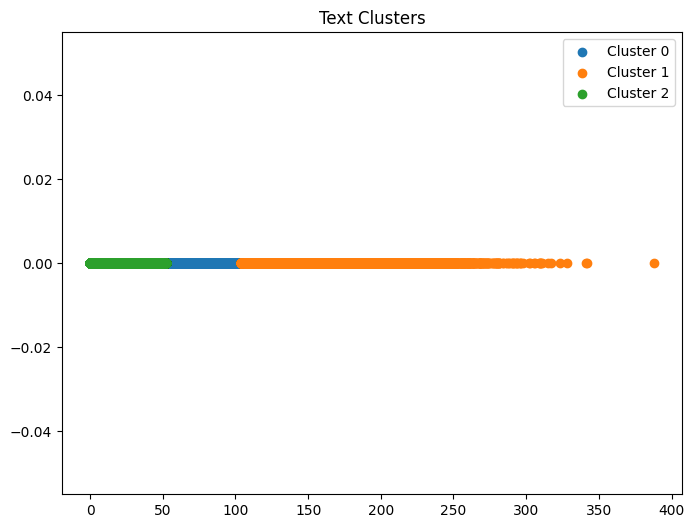

Epoch 1/10
8199/8199 ━━━━━━━━━━━━━━━━━━━━ 426s 51ms/step - accuracy: 0.7830 - loss: 0.5434 - val_accuracy: 0.9670 - val_loss: 0.1490
Epoch 2/10
8199/8199 ━━━━━━━━━━━━━━━━━━━━ 431s 53ms/step - accuracy: 0.9672 - loss: 0.1511 - val_accuracy: 0.9747 - val_loss: 0.1197
Epoch 3/10
8199/8199 ━━━━━━━━━━━━━━━━━━━━ 406s 50ms/step - accuracy: 0.9745 - loss: 0.1223 - val_accuracy: 0.9772 - val_loss: 0.1117
Epoch 4/10
8199/8199 ━━━━━━━━━━━━━━━━━━━━ 362s 44ms/step - accuracy: 0.9781 - loss: 0.1119 - val_accuracy: 0.9761 - val_loss: 0.1162
Epoch 5/10
8199/8199 ━━━━━━━━━━━━━━━━━━━━ 377s 46ms/step - accuracy: 0.9795 - loss: 0.1045 - val_accuracy: 0.9763 - val_loss: 0.1191
Epoch 6/10
8199/8199 ━━━━━━━━━━━━━━━━━━━━ 352s 43ms/step - accuracy: 0.9809 - loss: 0.1000 - val_accuracy: 0.9748 - val_loss: 0.1182


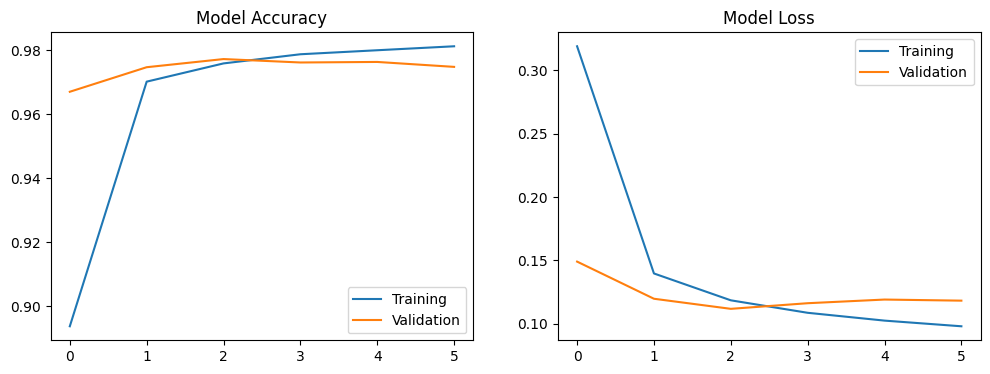

2562/2562 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.98      0.96      0.97     21784
     Neutral       0.98      0.99      0.99     34481
    Positive       0.97      0.97      0.97     25718

    accuracy                           0.98     81983
   macro avg       0.98      0.97      0.98     81983
weighted avg       0.98      0.98      0.98     81983



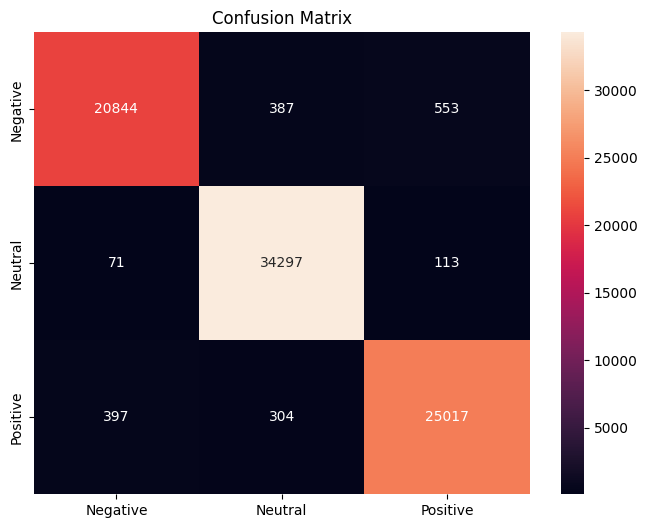

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted sentiment: Positive


In [15]:
# This script defines a SentimentAnalyzer class that uses deep learning
# to analyze the sentiment of text data. It includes text preprocessing,
# model building with LSTM, training, evaluation, and prediction functions.
# The model is optimized with regularization techniques to prevent overfitting.

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

class SentimentAnalyzer:
    def __init__(self, max_features=5000, maxlen=100, embedding_dim=50):
        self.max_features = max_features
        self.maxlen = maxlen
        self.embedding_dim = embedding_dim
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.tokenizer = None
        self.model = None
        
    def clean_text(self, text):
        text = str(text).lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        tokens = word_tokenize(text)
        tokens = [self.lemmatizer.lemmatize(token) for token in tokens if token not in self.stop_words]
        return ' '.join(tokens)

    def prepare_data(self, df, text_column, sentiment_column):
        print("Preprocessing texts...")
        df['processed_text'] = df[text_column].apply(self.clean_text)
        
        sentiment_map = {
            'negative': 0, 'neutral': 1, 'positive': 2,
            'neg': 0, 'neu': 1, 'pos': 2,
            '0': 0, '1': 1, '2': 2
        }
        y = df[sentiment_column].str.lower().str.strip().map(sentiment_map)
        
        self.tokenizer = Tokenizer(num_words=self.max_features)
        self.tokenizer.fit_on_texts(df['processed_text'])
        X = self.tokenizer.texts_to_sequences(df['processed_text'])
        X = pad_sequences(X, maxlen=self.maxlen)
        
        X_embedded = self.cluster_texts(X)
        
        return X, y, X_embedded

    def cluster_texts(self, X, n_clusters=3):
        X_mean = np.mean(X, axis=1).reshape(-1, 1)
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(X_mean)
        
        plt.figure(figsize=(8, 6))
        for i in range(n_clusters):
            plt.scatter(X_mean[clusters == i], np.zeros_like(X_mean[clusters == i]), label=f'Cluster {i}')
        plt.title('Text Clusters')
        plt.legend()
        plt.show()
        
        return clusters

    def build_optimized_model(self):
        model = Sequential([
            Embedding(self.max_features, self.embedding_dim, input_length=self.maxlen),
            LSTM(32, return_sequences=True, kernel_regularizer=l2(0.01)),
            Dropout(0.3),
            LSTM(16),
            Dropout(0.3),
            Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
            Dense(3, activation='softmax')
        ])
        
        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer,
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
        return model

    def train_model(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        self.model = self.build_optimized_model()
        
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
        
        history = self.model.fit(
            X_train, y_train,
            batch_size=32,
            epochs=10,
            validation_split=0.2,
            callbacks=[early_stopping],
            verbose=1
        )
        
        self.evaluate_model(X_test, y_test, history)
        
        return history

    def evaluate_model(self, X_test, y_test, history):
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training')
        plt.plot(history.history['val_accuracy'], label='Validation')
        plt.title('Model Accuracy')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training')
        plt.plot(history.history['val_loss'], label='Validation')
        plt.title('Model Loss')
        plt.legend()
        plt.show()
        
        y_pred = np.argmax(self.model.predict(X_test), axis=1)
        
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, 
                                 target_names=['Negative', 'Neutral', 'Positive']))
        
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', 
                   xticklabels=['Negative', 'Neutral', 'Positive'],
                   yticklabels=['Negative', 'Neutral', 'Positive'])
        plt.title('Confusion Matrix')
        plt.show()

    def predict(self, texts):
        processed_texts = [self.clean_text(text) for text in texts]
        sequences = self.tokenizer.texts_to_sequences(processed_texts)
        X = pad_sequences(sequences, maxlen=self.maxlen)
        predictions = self.model.predict(X)
        return ['Negative', 'Neutral', 'Positive'][np.argmax(predictions, axis=1)[0]]

# Usage example:
def main():
    analyzer = SentimentAnalyzer()
    X, y, clusters = analyzer.prepare_data(df, 'clean_tweet', 'sentiment')
    history = analyzer.train_model(X, y)
    
    new_texts = ["This is a great product!"]
    prediction = analyzer.predict(new_texts)
    print(f"Predicted sentiment: {prediction}")

if __name__ == "__main__":
    main()


Preprocessing texts...


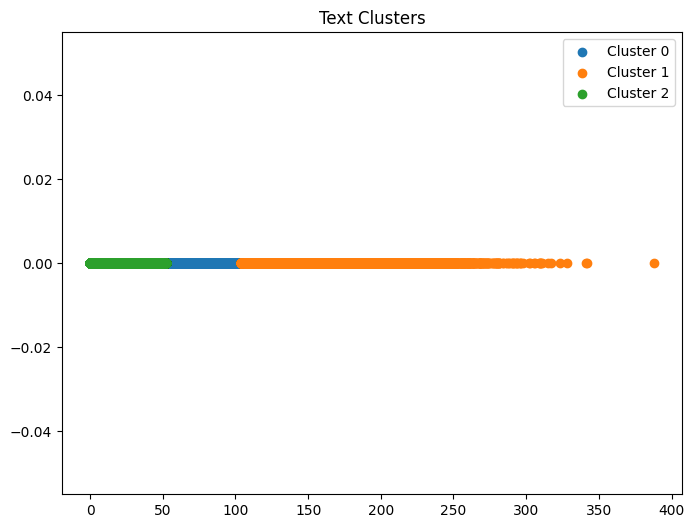


Training LSTM model...
Epoch 1/10
6559/6559 ━━━━━━━━━━━━━━━━━━━━ 289s 43ms/step - accuracy: 0.8199 - loss: 0.5326 - val_accuracy: 0.9670 - val_loss: 0.1783
Epoch 2/10
6559/6559 ━━━━━━━━━━━━━━━━━━━━ 289s 44ms/step - accuracy: 0.9661 - loss: 0.1677 - val_accuracy: 0.9521 - val_loss: 0.2310
Epoch 3/10
6559/6559 ━━━━━━━━━━━━━━━━━━━━ 283s 43ms/step - accuracy: 0.9624 - loss: 0.1742 - val_accuracy: 0.9767 - val_loss: 0.1141
Epoch 4/10
6559/6559 ━━━━━━━━━━━━━━━━━━━━ 276s 42ms/step - accuracy: 0.9748 - loss: 0.1248 - val_accuracy: 0.9783 - val_loss: 0.1099
Epoch 5/10
6559/6559 ━━━━━━━━━━━━━━━━━━━━ 272s 41ms/step - accuracy: 0.9766 - loss: 0.1184 - val_accuracy: 0.9785 - val_loss: 0.1097
Epoch 6/10
6559/6559 ━━━━━━━━━━━━━━━━━━━━ 297s 45ms/step - accuracy: 0.9772 - loss: 0.1152 - val_accuracy: 0.9754 - val_loss: 0.1187
Epoch 7/10
6559/6559 ━━━━━━━━━━━━━━━━━━━━ 294s 45ms/step - accuracy: 0.9788 - loss: 0.1104 - val_accuracy: 0.9784 - val_loss: 0.1099
Epoch 8/10
6559/6559 ━━━━━━━━━━━━━━━━━━━━ 280

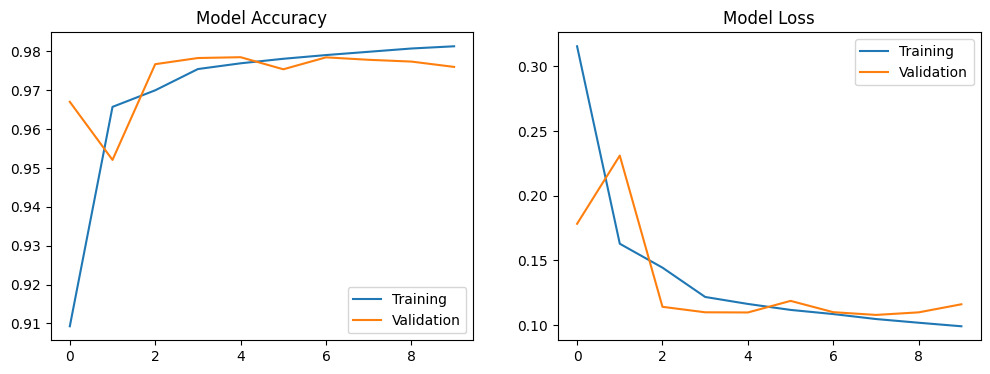

2050/2050 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.97      0.96      0.97     17540
     Neutral       0.98      0.99      0.99     27669
    Positive       0.98      0.97      0.97     20377

    accuracy                           0.98     65586
   macro avg       0.98      0.98      0.98     65586
weighted avg       0.98      0.98      0.98     65586



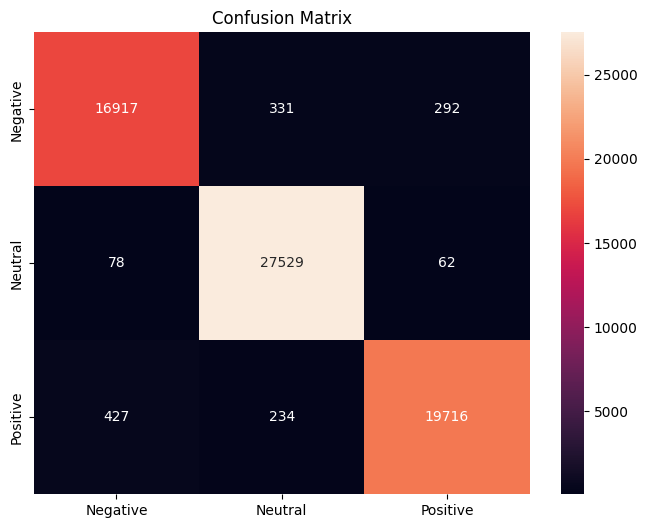

2562/2562 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step

Getting BERT predictions...


100%|██████████████████████████████████████████████████████████████████████████| 81983/81983 [2:08:02<00:00, 10.67it/s]



LSTM Model Classification Report:
              precision    recall  f1-score   support

    Negative       0.97      0.97      0.97     21784
     Neutral       0.98      0.99      0.99     34481
    Positive       0.98      0.97      0.98     25718

    accuracy                           0.98     81983
   macro avg       0.98      0.98      0.98     81983
weighted avg       0.98      0.98      0.98     81983


BERT Model Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.51      0.61     21784
     Neutral       0.52      0.93      0.66     34481
    Positive       0.88      0.18      0.30     25718

    accuracy                           0.58     81983
   macro avg       0.72      0.54      0.53     81983
weighted avg       0.69      0.58      0.54     81983



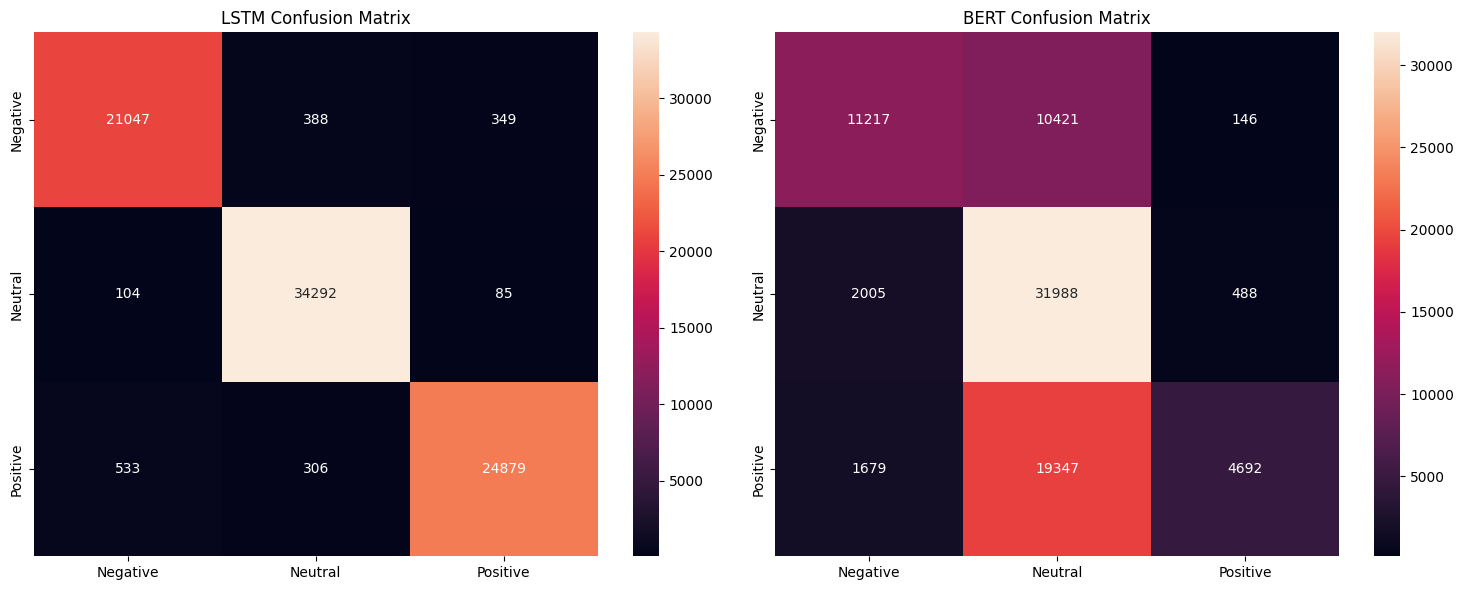


Sample Predictions Comparison:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step

Text: Overall, no complaints.
LSTM prediction: Negative
BERT prediction: NEU
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step

Text: Not very good
LSTM prediction: Positive
BERT prediction: NEG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

Text: Good place. No complaints.
LSTM prediction: Positive
BERT prediction: POS
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

Text: Host's attitude is so bad.
LSTM prediction: Negative
BERT prediction: NEG


In [21]:
# This class compares the performance of two sentiment analysis models: 
# an LSTM model and a BERT model. It prepares data, trains the LSTM model, 
# retrieves predictions from the BERT model, evaluates both models, 
# and visualizes their performance using confusion matrices.
class ModelComparison:
    def __init__(self, data, text_column='clean_tweet', label_column='sentiment'):
        self.data = data
        self.text_column = text_column
        self.label_column = label_column
        self.lstm_analyzer = None
        self.bert_pipeline = None
        
    def setup_models(self):
        """Initialize both models"""
        # Initialize LSTM Analyzer
        self.lstm_analyzer = SentimentAnalyzer()
        
        # Initialize BERT pipeline
        try:
            self.bert_pipeline = pipeline(
                model="finiteautomata/bertweet-base-sentiment-analysis",
                device=0 if torch.cuda.is_available() else -1  # Use GPU if available
            )
        except Exception as e:
            print(f"Error loading BERT model: {e}")
            return False
        return True
        
    def prepare_data(self):
        """Prepare data for both models"""
        # Prepare data for LSTM
        X, y, clusters = self.lstm_analyzer.prepare_data(
            self.data, 
            self.text_column, 
            self.label_column
        )
        return X, y
        
    def train_lstm(self, X, y):
        """Train LSTM model"""
        print("\nTraining LSTM model...")
        history = self.lstm_analyzer.train_model(X, y)
        return history
        
    def get_bert_predictions(self, texts):
        """Get predictions from BERT model"""
        predictions = []
        print("\nGetting BERT predictions...")
        for text in tqdm(texts):
            try:
                result = self.bert_pipeline(text)
                # Mapping BERT labels to numeric values
                label_map = {'NEG': 0, 'NEU': 1, 'POS': 2}
                predictions.append(label_map[result[0]['label']])
            except Exception as e:
                print(f"Error processing text with BERT: {e}")
                predictions.append(1) 
        return predictions
        
    def evaluate_models(self, X_test, y_test, texts_test):
        """Evaluate and compare both models"""
        # Get predictions from both models
        lstm_predictions = np.argmax(self.lstm_analyzer.model.predict(X_test), axis=1)
        bert_predictions = self.get_bert_predictions(texts_test)
        
        # Print classification reports
        print("\nLSTM Model Classification Report:")
        print(classification_report(y_test, lstm_predictions,
                                 target_names=['Negative', 'Neutral', 'Positive']))
        
        print("\nBERT Model Classification Report:")
        print(classification_report(y_test, bert_predictions,
                                 target_names=['Negative', 'Neutral', 'Positive']))
        
        # Plot confusion matrices
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # LSTM Confusion Matrix
        cm_lstm = confusion_matrix(y_test, lstm_predictions)
        sns.heatmap(cm_lstm, annot=True, fmt='d', ax=ax1,
                   xticklabels=['Negative', 'Neutral', 'Positive'],
                   yticklabels=['Negative', 'Neutral', 'Positive'])
        ax1.set_title('LSTM Confusion Matrix')
        
        # BERT Confusion Matrix
        cm_bert = confusion_matrix(y_test, bert_predictions)
        sns.heatmap(cm_bert, annot=True, fmt='d', ax=ax2,
                   xticklabels=['Negative', 'Neutral', 'Positive'],
                   yticklabels=['Negative', 'Neutral', 'Positive'])
        ax2.set_title('BERT Confusion Matrix')
        
        plt.tight_layout()
        plt.show()
        
        # Return metrics for comparison
        return {
            'lstm_predictions': lstm_predictions,
            'bert_predictions': bert_predictions,
            'actual': y_test
        }

def main():
    comparison = ModelComparison(df, 'clean_tweet', 'sentiment')
    
    # Setup models
    if not comparison.setup_models():
        return
    
    # Prepare data
    X, y = comparison.prepare_data()
    
    # Split data
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test, texts_train, texts_test = train_test_split(
        X, y, df['clean_tweet'].values, test_size=0.2, random_state=42
    )
    
    # Train LSTM
    history = comparison.train_lstm(X_train, y_train)
    
    # Evaluate both models
    results = comparison.evaluate_models(X_test, y_test, texts_test)
    
    # Sample predictions
    sample_texts = [
        "Overall, no complaints.",
        "Not very good",
        "Good place. No complaints.",
        "Host's attitude is so bad."
    ]
    
    print("\nSample Predictions Comparison:")
    for text in sample_texts:
        lstm_pred = comparison.lstm_analyzer.predict([text])
        bert_pred = comparison.bert_pipeline(text)[0]['label']
        print(f"\nText: {text}")
        print(f"LSTM prediction: {lstm_pred}")
        print(f"BERT prediction: {bert_pred}")

if __name__ == "__main__":
    main()